In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle
import json
from Utils.evaluation import EvaluationMetrics, ActualStats
from Utils.helper import *
from Utils.sample_squads import *

## Initialize

In [2]:
model_inn1 = tf.keras.models.load_model('Models\Inn1-HeavyDense-ep20to50\cp-0029.h5')
model_inn2 = tf.keras.models.load_model('Models\Inn2-HeavyDenseRequired-ep30to50\cp-0016.h5')

In [3]:
evaluator = EvaluationMetrics(model_inn1, model_inn2,
                              )
                            #   "Evaluation/tournament1.pkl")

In [4]:
# set_bs = set(BS_Cols)
# for i in evaluator.teams:
#     (batting, bowling), venue = i
#     for name in batting[1:]:
#         if "Striker_"+name not in set_bs:
#             print("Striker_"+name)
#         if "Non_Striker_"+name not in set_bs:
#             print("Non_Striker_"+name)
#         if "Bowler_"+name not in set_bs:
#             print("Bowler_"+name)
#     for name in bowling[1:]:
#         if "Striker_"+name not in set_bs:
#             print("Striker_"+name)
#         if "Non_Striker_"+name not in set_bs:
#             print("Non_Striker_"+name)
#         if "Bowler_"+name not in set_bs:
#             print("Bowler_"+name)
#     if "Venue_"+venue not in set_bs:
#         print("Venue_"+venue)
#     if "Batting_Team_"+batting[0] not in set_bs:
#         print("Batting_Team_"+batting[0])
#     if "Batting_Team_"+bowling[0] not in set_bs:
#         print("Batting_Team_"+bowling[0])
#     if "Toss_"+batting[0] not in set_bs:
#         print("Toss_"+batting[0])
#     if "Toss_"+bowling[0] not in set_bs:
#         print("Toss_"+bowling[0])
#     if "Bowling_Team_"+batting[0] not in set_bs:
#         print("Bowling_Team_"+batting[0])
#     if "Bowling_Team_"+bowling[0] not in set_bs:
#         print("Bowling_Team_"+bowling[0])

In [5]:
num_tournaments = 5
verbose = 0
for t in range(num_tournaments):
    print(f"Tournament {t+1}/{num_tournaments}:")
    evaluator.reinitialize_tournament()
    for _ in tqdm(range(56), ncols=80, disable=True if verbose!=0 else False):
        if verbose != 0:
            print(f"\n\nMatch number: {evaluator.match_count+1}")   
        evaluator.simulate_match(verbose)   
    evaluator.display_table()
    evaluator.save_object("Evaluation/tournament3_1.pkl")

Tournament 1/5:


100%|███████████████████████████████████████████| 56/56 [23:19<00:00, 24.99s/it]


,Played,Wins,Losses,Points,NRR
Mumbai Indians,14,10,4,20,1.133229
Rajasthan Royals,14,9,4,19,0.557884
Royal Challengers Bangalore,14,7,6,15,-0.092851
Kolkata Knight Riders,14,7,7,14,-0.146535
Chennai Super Kings,14,6,8,12,-0.149355
Sunrisers Hyderabad,14,6,8,12,-0.453456
Delhi Capitals,14,5,9,10,-0.299090
Kings XI Punjab,14,5,9,10,-0.509668


Tournament 2/5:


100%|███████████████████████████████████████████| 56/56 [20:35<00:00, 22.06s/it]


,Played,Wins,Losses,Points,NRR
Mumbai Indians,14,10,3,21,0.575382
Royal Challengers Bangalore,14,9,5,18,0.647303
Kings XI Punjab,14,9,5,18,-0.004901
Kolkata Knight Riders,14,7,6,15,0.422942
Chennai Super Kings,14,6,7,13,-0.188990
Sunrisers Hyderabad,14,5,9,10,-0.231598
Delhi Capitals,14,4,9,9,-0.326759
Rajasthan Royals,14,4,10,8,-0.869406


Tournament 3/5:


100%|███████████████████████████████████████████| 56/56 [19:51<00:00, 21.28s/it]


,Played,Wins,Losses,Points,NRR
Delhi Capitals,14,10,4,20,-0.096568
Royal Challengers Bangalore,14,8,6,16,0.486552
Chennai Super Kings,14,8,6,16,0.259143
Rajasthan Royals,14,8,6,16,0.213781
Mumbai Indians,14,7,7,14,-0.622111
Sunrisers Hyderabad,14,6,8,12,0.293612
Kings XI Punjab,14,6,8,12,0.045755
Kolkata Knight Riders,14,3,11,6,-0.622346


Tournament 4/5:


100%|███████████████████████████████████████████| 56/56 [20:30<00:00, 21.97s/it]


,Played,Wins,Losses,Points,NRR
Kolkata Knight Riders,14,9,5,18,0.809242
Delhi Capitals,14,9,5,18,0.376771
Mumbai Indians,14,7,5,16,0.739964
Chennai Super Kings,14,7,7,14,0.332421
Kings XI Punjab,14,7,7,14,-0.460041
Sunrisers Hyderabad,14,6,7,13,-0.362041
Royal Challengers Bangalore,14,5,8,11,-0.830935
Rajasthan Royals,14,4,10,8,-0.653436


Tournament 5/5:


100%|███████████████████████████████████████████| 56/56 [20:16<00:00, 21.71s/it]


,Played,Wins,Losses,Points,NRR
Mumbai Indians,14,10,4,20,0.402260
Rajasthan Royals,14,8,6,16,0.497872
Kolkata Knight Riders,14,8,6,16,0.282577
Royal Challengers Bangalore,14,8,6,16,0.187900
Sunrisers Hyderabad,14,8,6,16,-0.041527
Kings XI Punjab,14,6,8,12,-0.416454
Delhi Capitals,14,5,9,10,-0.124402
Chennai Super Kings,14,3,11,6,-0.814148


In [6]:
"Required_Runs" in (BS_Cols)


True

In [7]:
actualstat = ActualStats("Evaluation/actual.pkl")
# actualstat = ActualStats()
# actualstat.run_df(1, True)
# actualstat.run_df(2, True)
# actualstat.save_object("Evaluation/actual.pkl")   

In [8]:
len(actualstat.chasing_stat), len(actualstat.total_stat)

(795, 796)

## First Innings Target Evaluation

In [9]:
from scipy import stats
# stats.ttest_ind(evaluator.total_stat[::2], actualstat.total_stat, equal_var=False)
stats.ks_2samp(evaluator.total_stat, actualstat.total_stat)


KstestResult(statistic=0.036486001435750176, pvalue=0.933793526744867)

In [10]:
len(evaluator.total_stat), len(actualstat.total_stat)

(280, 796)

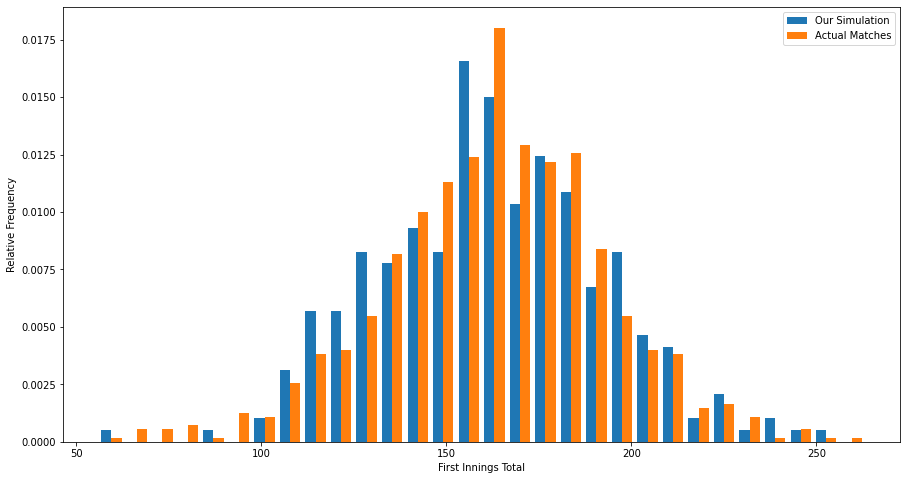

In [11]:
import matplotlib.pyplot as plt
plt.hist([evaluator.total_stat, actualstat.total_stat], density=True, bins=30, label=["Our Simulation", "Actual Matches"])
plt.legend()
plt.xlabel("First Innings Total")
plt.ylabel("Relative Frequency")
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [12]:
import statistics
import math
mean_sim = statistics.mean(evaluator.total_stat)
variance_sim = statistics.variance(evaluator.total_stat)
mean_actual = statistics.mean(actualstat.total_stat)
variance_actual = statistics.variance(actualstat.total_stat)
z = abs(mean_actual - mean_sim)/(math.sqrt(variance_actual+variance_sim))
print(z)

0.006341691325247162


In [13]:
mean_actual, mean_sim,variance_actual, variance_sim

(162.44095477386935, 162.71428571428572, 917.474496697323, 940.1904761904761)

## Second Innings Evaluation

## Progression Evaluation

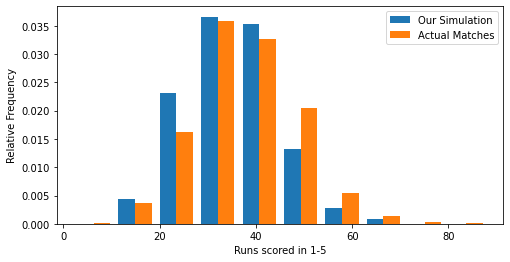

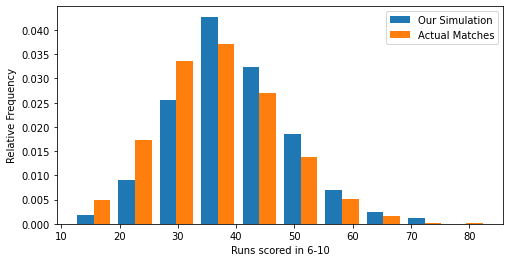

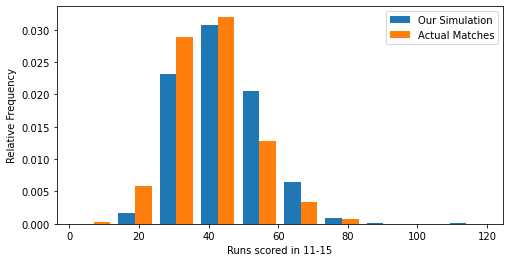

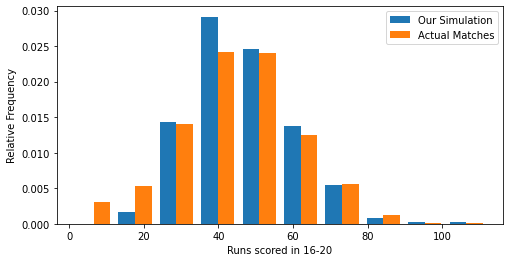

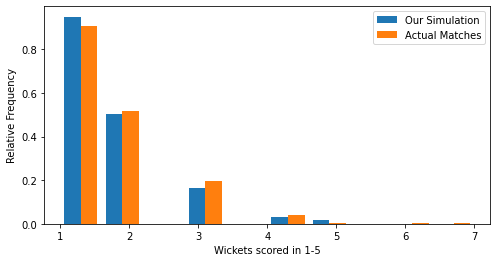

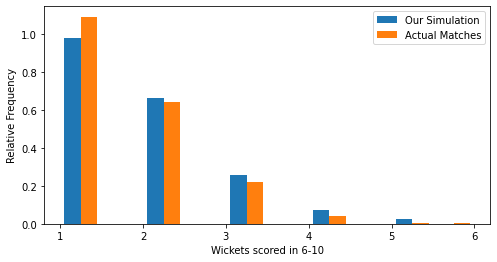

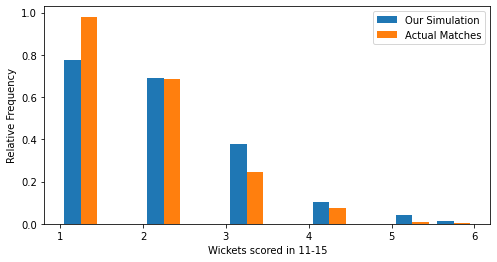

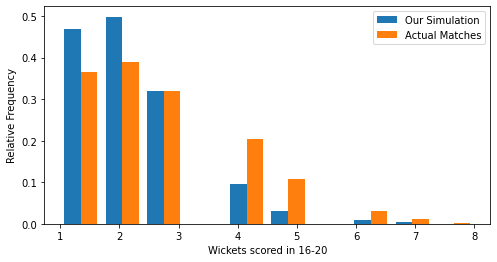

In [11]:
import matplotlib.pyplot as plt
for key in ["runs", "wickets"]:
    for i in range(4):
        plt.hist([[k for k in evaluator.progression_stat[key][i] if k!=0], [k for k in actualstat.progression_stat[key][i] if k!=0]],
                 density=True, bins=10, label=["Our Simulation", "Actual Matches"])
        plt.legend()
        plt.xlabel(f"{key.title()} scored in {i*5+1}-{i*5+5}")
        plt.ylabel("Relative Frequency")
        fig = plt.gcf()
        fig.set_size_inches(8, 4)
        plt.show()

## Batsmen Statistics

In [17]:
batsmen_result_dic = {}
bat_stat = evaluator.batsmen_stat
for batsman in bat_stat:
    tot_runs = 0
    tot_balls = 0
    num_4 = 0
    num_6 = 0
    num_inn = 0
    num_out = 0
    hs = [0, ""]
    dismissal_type = []
    dismissed_by = []
    for i in bat_stat[batsman]:
        num_inn += 1
        tot_runs += i["Runs"]
        if i["Runs"] > hs[0] or (i["Runs"] == hs[0] and hs[1] == ""):
            hs[0] = i["Runs"]
            if i["Dismissal Type"] != "Not Out":
                hs[1] = "*"
        tot_balls += i["Balls Faced"]
        num_4 += i["Fours"]
        num_6 += i["Sixes"]
        if i["Dismissal Type"] != "Not Out":
            num_out += 1
        dismissal_type.append(i["Dismissal Type"])
        dismissed_by.append(i["Dismissed By"])
    batsmen_result_dic[batsman] = {
        "Innings": num_inn,
        "Runs": tot_runs,
        "Balls": tot_balls,
        "Fours": num_4,
        "Sixes": num_6,
        "High Score": "".join([str(i) for i in hs]),
        "Average": tot_runs/num_out if num_out!=0 else tot_runs,
        "Strike Rate": tot_runs/tot_balls*100 if tot_balls!=0 else 0,
        "Boundry Percent": (6*num_6+4*num_4)/tot_runs*100 if tot_runs!=0 else 0,
        }
batsmen_stat_df = pd.DataFrame.from_dict(batsmen_result_dic, orient='index')
save_df = batsmen_stat_df.sort_values(by=["Runs", "Balls"], ascending=False)
save_df.to_csv("Evaluation/Evaluate_Batsmen.csv")
save_df.head(20)

,Innings,Runs,Balls,Fours,Sixes,High Score,Average,Strike Rate,Boundry Percent
F du Plessis,56,1939,1384,177,83,134*,36.584906,140.101156,62.197009
P Shaw,56,1919,1454,215,60,128*,36.903846,131.980743,63.574779
J Bairstow,56,1896,1334,200,79,195*,37.176471,142.128936,67.194093
CA Lynn,56,1889,1411,205,65,97*,36.326923,133.876683,64.055056
CH Gayle,56,1884,1426,206,69,92*,37.680000,132.117812,65.711253
KL Rahul,56,1836,1465,187,61,124*,36.720000,125.324232,60.675381
PA Patel,56,1834,1338,197,64,119*,35.269231,137.070254,63.904035
S Gill,56,1755,1338,210,51,156*,33.750000,131.165919,65.299145
RG Sharma,56,1698,1343,167,57,113*,31.444444,126.433358,59.481743
SR Watson,56,1671,1337,158,68,108*,31.528302,124.981301,62.238181


## Bowler Statistics

In [110]:
bowler_result_dic = {}
bowler_stat = evaluator.bowler_stat
for bowler in bowler_stat:
    tot_runs = 0
    tot_balls = 0
    tot_wickets = 0
    for i in bowler_stat[bowler]:
        tot_runs += i["Runs Conceded"]
        tot_balls += i["Balls"]
        tot_wickets += i["Wickets Taken"]
    bowler_result_dic[bowler] = {
        "Runs Conceded": tot_runs,
        "Overs": f"{tot_balls//6}.{tot_balls%6}",
        "Wickets": tot_wickets,
        "Economy": tot_runs/tot_balls*6 if tot_balls != 0 else 0,
        }
bowler_stat_df = pd.DataFrame.from_dict(bowler_result_dic, orient='index')
save_df = bowler_stat_df.sort_values(by=["Wickets", "Economy"], ascending=[False, True])
save_df.to_csv("Evaluation/Evaluate_Bowler.csv")
save_df.head(20)

## Players Matchwise Evaluation 

In [12]:
actual_batsmen_df = pd.read_csv("Evaluation/Actual_Batsmen.csv")
evaluate_batsmen_df = pd.read_csv("Evaluation/Evaluate_Batsmen.csv")
actual_bowler_df = pd.read_csv("Evaluation/Actual_Bowler.csv")
evaluate_bowler_df = pd.read_csv("Evaluation/Evaluate_Bowler.csv")

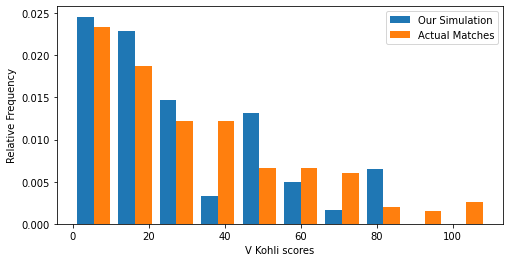

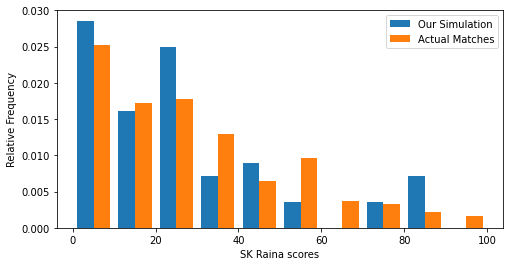

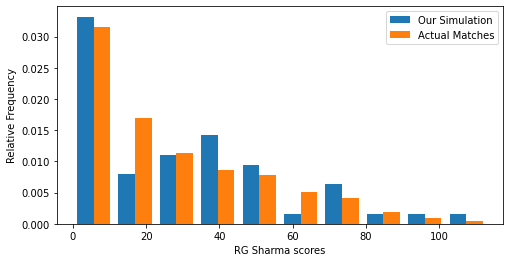

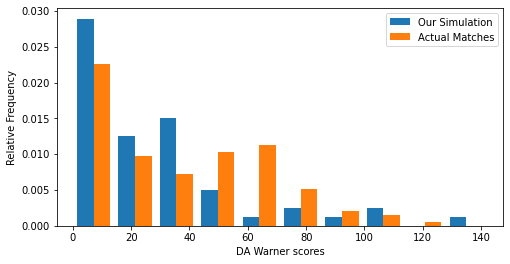

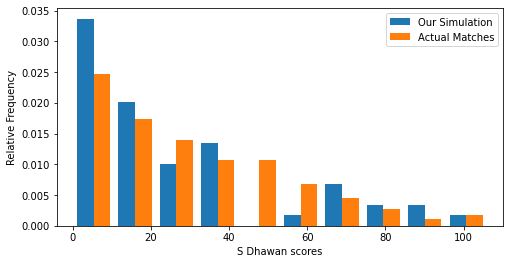

In [13]:
for player in list(actual_batsmen_df["Unnamed: 0"])[:5]: 
    if player not in evaluator.batsmen_stat:
        continue
    player_actual = [i["Runs"] for i in actualstat.batsmen_stat[player]]
    player_evaluator = [i["Runs"] for i in evaluator.batsmen_stat[player]]
    plt.hist([player_evaluator, player_actual], 
            density=True, bins=10,
            label=["Our Simulation", "Actual Matches"])
    plt.legend()
    plt.xlabel(f"{player} scores")
    plt.ylabel("Relative Frequency")
    fig = plt.gcf()
    fig.set_size_inches(8, 4)
    plt.show()

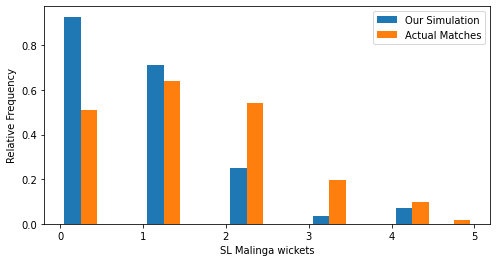

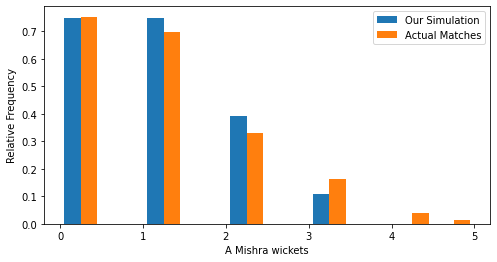

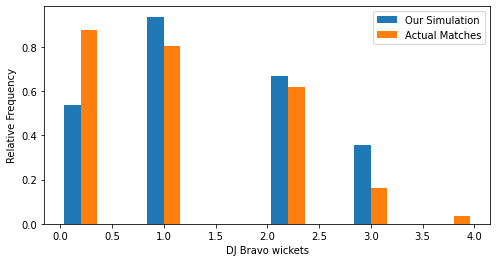

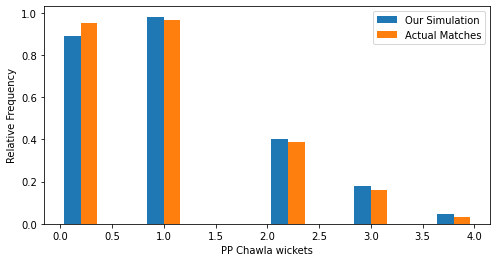

In [14]:
for player in list(actual_bowler_df["Unnamed: 0"])[:5]: 
    if player not in evaluator.bowler_stat:
        continue
    player_actual = [i["Wickets Taken"] for i in actualstat.bowler_stat[player]]
    player_evaluator = [i["Wickets Taken"] for i in evaluator.bowler_stat[player]]
    plt.hist([player_evaluator, player_actual], 
            density=True, bins=10,
            label=["Our Simulation", "Actual Matches"])
    plt.legend()
    plt.xlabel(f"{player} wickets")
    plt.ylabel("Relative Frequency")
    fig = plt.gcf()
    fig.set_size_inches(8, 4)
    plt.show()